#  Customer Support Ticket Analytics — EDA (Industry Level)

**Project:** Customer Satisfaction Prediction  
**Dataset:** customer_support_tickets.csv  
**Notebook:** 01_EDA.ipynb  

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
import matplotlib.dates as mdates

from wordcloud import WordCloud, STOPWORDS

import os
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid")

plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["axes.edgecolor"] = "#E5E7EB"
plt.rcParams["axes.labelcolor"] = "#111827"
plt.rcParams["text.color"] = "#111827"
plt.rcParams["xtick.color"] = "#6B7280"
plt.rcParams["ytick.color"] = "#6B7280"
plt.rcParams["grid.color"] = "#E5E7EB"
plt.rcParams["axes.titleweight"] = "bold"
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["font.size"] = 11
DATA_PATH = "customer_support_tickets.csv"
OUTPUT_DIR = "outputs/figures"
os.makedirs(OUTPUT_DIR, exist_ok=True)

OUTPUT_DIR = "../outputs/figures"
os.makedirs(OUTPUT_DIR, exist_ok=True)
print("OUTPUT_DIR ready:", OUTPUT_DIR)


OUTPUT_DIR ready: ../outputs/figures


## Load Dataset

In [4]:
DATA_PATH = "../data/customer_support_tickets.csv"
df = pd.read_csv(DATA_PATH)
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


## Data Overview
- dataset shape
- column names
- datatypes
- duplicates
- missing value summary

In [4]:
print("Shape:", df.shape)
print("Duplicates:", df.duplicated().sum())

display(df.info())

missing_counts = df.isna().sum().sort_values(ascending=False)
missing_pct = (df.isna().mean()*100).sort_values(ascending=False)

display(pd.DataFrame({
    "missing_count": missing_counts,
    "missing_pct": missing_pct
}).head(20))

Shape: (8469, 17)
Duplicates: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               

None

,missing_count,missing_pct
Customer Satisfaction Rating,5700,67.304286
Time to Resolution,5700,67.304286
Resolution,5700,67.304286
First Response Time,2819,33.286102
Ticket Description,0,0.000000
Ticket Channel,0,0.000000
Ticket Priority,0,0.000000
Ticket Status,0,0.000000
Ticket ID,0,0.000000
Customer Name,0,0.000000


In [5]:
print(df.columns.tolist())
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
[col for col in df.columns if "satisfaction" in col]

['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age', 'Customer Gender', 'Product Purchased', 'Date of Purchase', 'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status', 'Resolution', 'Ticket Priority', 'Ticket Channel', 'First Response Time', 'Time to Resolution', 'Customer Satisfaction Rating']


['customer_satisfaction_rating']

In [6]:
df = df.rename(columns={
    "customer_satisfaction_rating": "satisfaction_rating",
    "ticket_priority": "priority",
    "ticket_channel": "channel",
    "ticket_subject": "ticket_subject",
    "ticket_description": "ticket_description",
    "date_of_purchase": "date"
})
[col for col in df.columns if "satisfaction" in col]

['satisfaction_rating']

## Missing Value Diagnostics

## Missing Values Heatmap

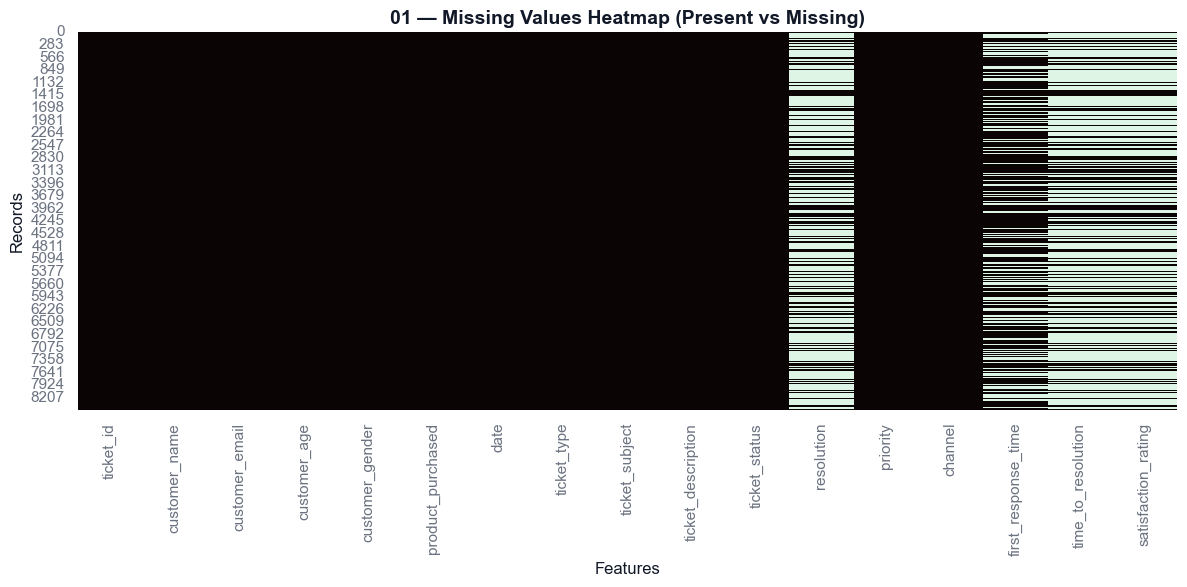

Saved: ../outputs/figures\01_missing_values_heatmap.png


In [12]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isna(), cbar=False, cmap="mako")
plt.title("01 — Missing Values Heatmap (Present vs Missing)")
plt.xlabel("Features")
plt.ylabel("Records")
plt.tight_layout()

save_path = os.path.join(OUTPUT_DIR, "01_missing_values_heatmap.png")
plt.savefig(save_path, dpi=300)
plt.show()

print("Saved:", save_path)

## Missing Values Percentage

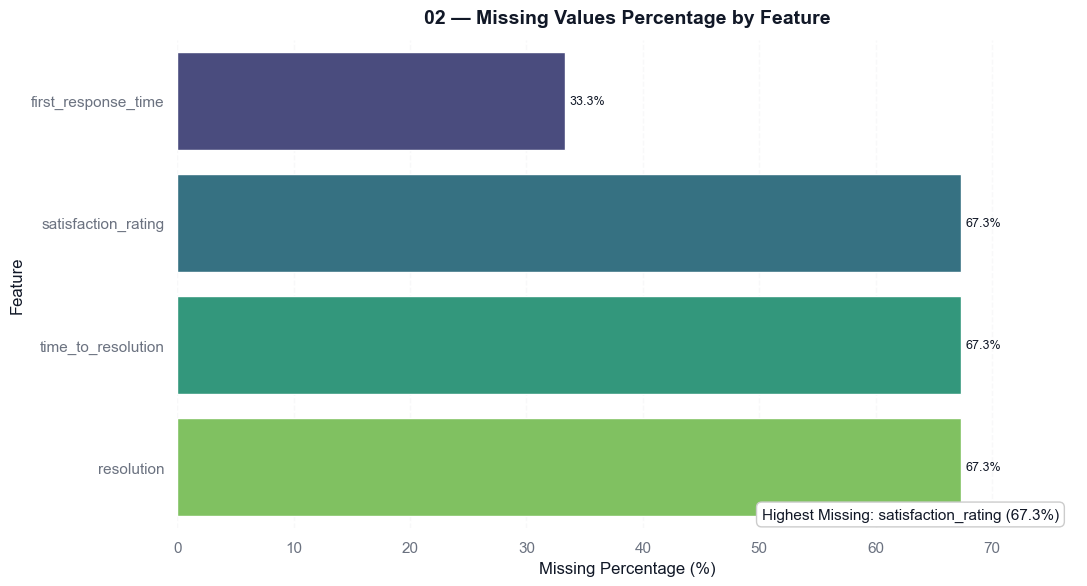

Saved: ../outputs/figures\02_missing_values_percentage.png


In [11]:
missing_pct = (df.isna().mean() * 100).sort_values(ascending=False)
missing_pct = missing_pct[missing_pct > 0]

if missing_pct.empty:
    print("No missing values found in dataset.")
else:
    TOP_N = min(15, len(missing_pct))
    missing_top = missing_pct.head(TOP_N).sort_values(ascending=True)

    plt.figure(figsize=(11, 6))

    colors = sns.color_palette("viridis", n_colors=len(missing_top))

    ax = sns.barplot(
        x=missing_top.values,
        y=missing_top.index,
        palette=colors)

    for i, v in enumerate(missing_top.values):
        ax.text(v + 0.4, i, f"{v:.1f}%", va="center", fontsize=9)

    ax.set_title("02 — Missing Values Percentage by Feature", pad=12)
    ax.set_xlabel("Missing Percentage (%)")
    ax.set_ylabel("Feature")

    ax.set_xlim(0, min(100, missing_top.max() + 10))

    ax.grid(True, axis="x", linestyle="--", alpha=0.25)
    sns.despine(left=True, bottom=True)

    most_missing_col = missing_pct.index[0]
    most_missing_val = missing_pct.iloc[0]
    plt.text(
        0.98, 0.02,
        f"Highest Missing: {most_missing_col} ({most_missing_val:.1f}%)",
        transform=ax.transAxes,
        ha="right",
        fontsize=11,
        bbox=dict(boxstyle="round,pad=0.35", fc="white", ec="0.8")
    )

    plt.tight_layout()

    save_path = os.path.join(OUTPUT_DIR, "02_missing_values_percentage.png")
    plt.savefig(save_path, dpi=300)
    plt.show()

    print("Saved:", save_path)

 ## Ticket Status Distribution

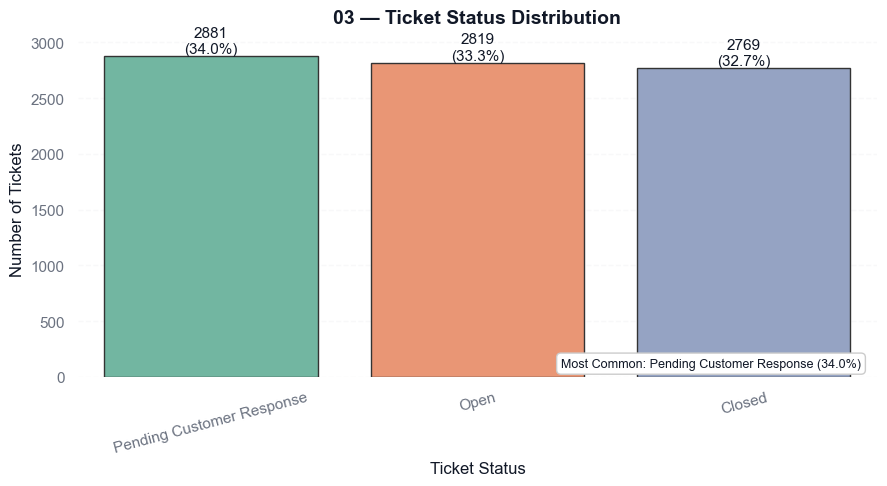

Saved: ../outputs/figures\03_ticket_status_distribution.png


In [10]:
order = df["ticket_status"].value_counts().index

plt.figure(figsize=(9, 5))
colors = sns.color_palette("Set2", n_colors=len(order))

ax = sns.countplot(
    x="ticket_status",
    data=df,
    order=order,
    palette=colors,
    edgecolor="0.2")

total = len(df)

for p in ax.patches:
    count = int(p.get_height())
    pct = (count / total) * 100
    
    ax.annotate(
        f"{count}\n({pct:.1f}%)",
        (p.get_x() + p.get_width()/2, count),
        ha="center",
        va="bottom",
        fontsize=11)

ax.set_title("03 — Ticket Status Distribution", pad=12)
ax.set_xlabel("Ticket Status")
ax.set_ylabel("Number of Tickets")
ax.grid(True, axis="y", linestyle="--", alpha=0.25)
sns.despine(left=True, bottom=True)

plt.xticks(rotation=15)

top_status = df["ticket_status"].value_counts().idxmax()
top_count = df["ticket_status"].value_counts().max()
top_pct = (top_count / total) * 100
plt.text(
    0.98, 0.03,
    f"Most Common: {top_status} ({top_pct:.1f}%)",
    transform=ax.transAxes,
    ha="right",
    fontsize=9,
    bbox=dict(boxstyle="round,pad=0.35", fc="white", ec="0.8"))
plt.tight_layout()

save_path = os.path.join(OUTPUT_DIR, "03_ticket_status_distribution.png")
plt.savefig(save_path, dpi=300)
plt.show()

print("Saved:", save_path)

## Satisfaction Rating Distribution

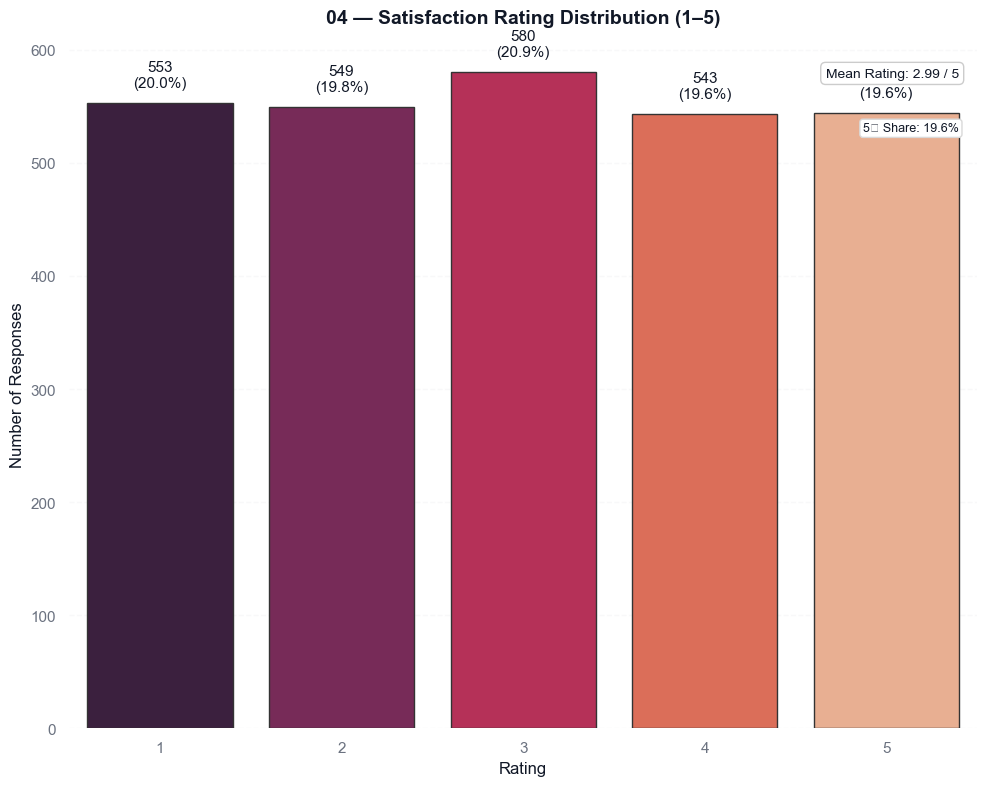

Saved: ../outputs/figures\04_satisfaction_rating_distribution.png


In [14]:
df["satisfaction_rating"] = pd.to_numeric(df["satisfaction_rating"], errors="coerce")

order = [1, 2, 3, 4, 5]
rating_counts = df["satisfaction_rating"].value_counts().reindex(order).fillna(0)
total = rating_counts.sum()
mean_rating = df["satisfaction_rating"].mean()

plt.figure(figsize=(10, 8))
colors = sns.color_palette("rocket", n_colors=5)

ax = sns.barplot(
    x=rating_counts.index.astype(int),
    y=rating_counts.values,
    palette=colors,
    edgecolor="0.2")
for i, v in enumerate(rating_counts.values):
    pct = (v / total) * 100 if total > 0 else 0
    ax.text(
        i, v + (0.02 * max(rating_counts.values)),
        f"{int(v)}\n({pct:.1f}%)",
        ha="center",
        va="bottom",
        fontsize=11)

ax.set_title("04 — Satisfaction Rating Distribution (1–5)", pad=12)
ax.set_xlabel("Rating")
ax.set_ylabel("Number of Responses")
ax.grid(True, axis="y", linestyle="--", alpha=0.25)
sns.despine(left=True, bottom=True)

plt.text(
    0.98, 0.96,
    f"Mean Rating: {mean_rating:.2f} / 5",
    transform=ax.transAxes,
    ha="right",
    va="top",
    fontsize=10,
    bbox=dict(boxstyle="round,pad=0.35", fc="white", ec="0.8"))
best_pct = (rating_counts.loc[5] / total) * 100 if total > 0 else 0
plt.text(
    0.98, 0.88,
    f"5★ Share: {best_pct:.1f}%",
    transform=ax.transAxes,
    ha="right",
    va="top",
    fontsize=9,
    bbox=dict(boxstyle="round,pad=0.25", fc="white", ec="0.85"))
plt.tight_layout()

save_path = os.path.join(OUTPUT_DIR, "04_satisfaction_rating_distribution.png")
plt.savefig(save_path, dpi=300)
plt.show()

print("Saved:", save_path)

## Satisfaction vs Priority

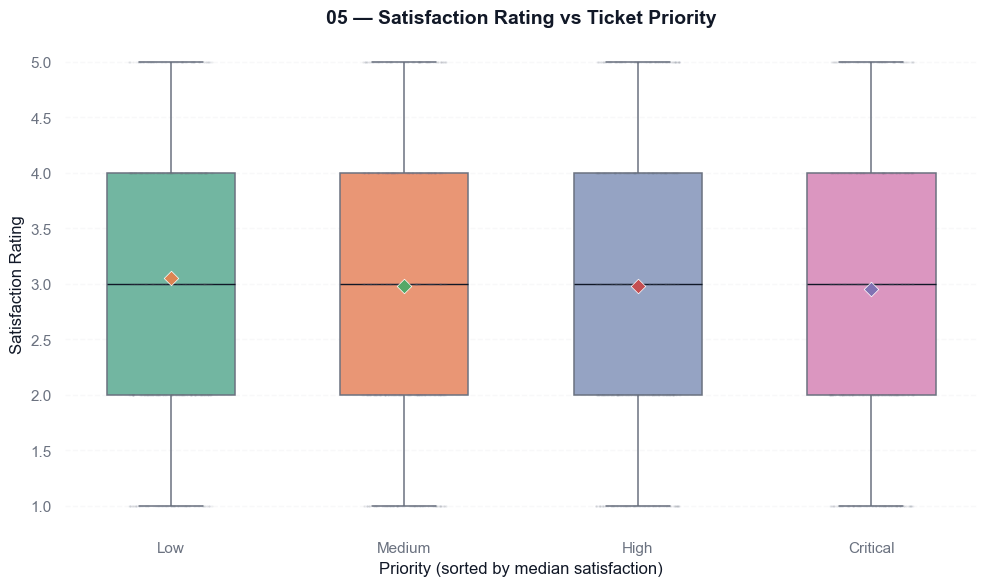

Saved: ../outputs/figures\05_satisfaction_vs_priority.png


In [17]:
temp = df.copy()
temp["satisfaction_rating"] = pd.to_numeric(temp["satisfaction_rating"], errors="coerce")
temp = temp.dropna(subset=["priority", "satisfaction_rating"])

priority_order = ["Low", "Medium", "High", "Critical"]
existing = [p for p in priority_order if p in temp["priority"].unique()]
priority_order = existing if existing else sorted(temp["priority"].unique())

plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    x="priority",
    y="satisfaction_rating",
    data=temp,
    order=priority_order,
    palette="Set2",
    width=0.55,
    showfliers=False,
    linewidth=1.1,
    boxprops={"edgecolor": "#6B7280"},
    whiskerprops={"color": "#6B7280"},
    capprops={"color": "#6B7280"},
    medianprops={"color": "#111827", "linewidth": 1})

sns.stripplot(
    x="priority",
    y="satisfaction_rating",
    data=temp,
    order=priority_order,
    size=1.5,
    alpha=0.07,
    jitter=0.18,
    color="#6B7280")

means = temp.groupby("priority")["satisfaction_rating"].mean().reindex(priority_order)
for i, m in enumerate(means.values):
    plt.scatter(i, m, marker="D", s=55, zorder=5, edgecolor="white", linewidth=0.5,
                label="Mean" if i == 0 else "")

ax.set_title("05 — Satisfaction Rating vs Ticket Priority", pad=12)
ax.set_xlabel("Priority (sorted by median satisfaction)")
ax.set_ylabel("Satisfaction Rating")

ax.grid(True, axis="y", linestyle="--", alpha=0.25)
sns.despine(left=True, bottom=True)

plt.tight_layout()

save_path = os.path.join(OUTPUT_DIR, "05_satisfaction_vs_priority.png")
plt.savefig(save_path, dpi=300)
plt.show()

print("Saved:", save_path)

## Avg Satisfaction by Channel

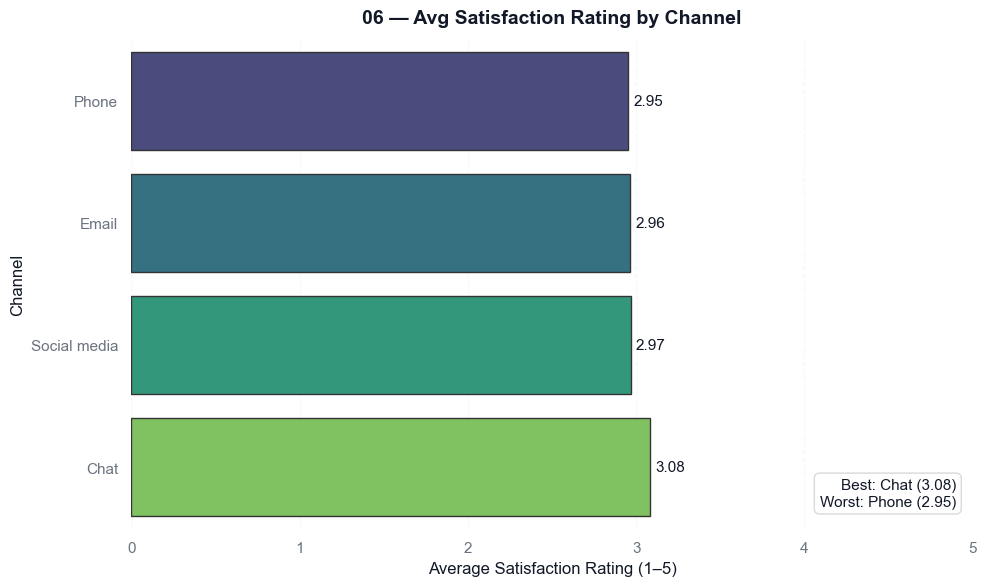

Saved: ../outputs/figures\06_avg_satisfaction_by_channel.png


In [19]:
avg_channel = df.groupby("channel")["satisfaction_rating"].mean().sort_values(ascending=True)

plt.figure(figsize=(10, 6))

colors = sns.color_palette("viridis", n_colors=len(avg_channel))

ax = sns.barplot(
    x=avg_channel.values,
    y=avg_channel.index,
    palette=colors,
    edgecolor="0.2")

for i, v in enumerate(avg_channel.values):
    ax.text(v + 0.03, i, f"{v:.2f}", va="center", fontsize=11)

ax.set_title("06 — Avg Satisfaction Rating by Channel", pad=12)
ax.set_xlabel("Average Satisfaction Rating (1–5)")
ax.set_ylabel("Channel")

ax.set_xlim(0, 5)

ax.grid(True, axis="x", linestyle="--", alpha=0.25)
sns.despine(left=True, bottom=True)

best_channel = avg_channel.idxmax()
best_val = avg_channel.max()

worst_channel = avg_channel.idxmin()
worst_val = avg_channel.min()

plt.text(
    0.98, 0.04,
    f"Best: {best_channel} ({best_val:.2f})\nWorst: {worst_channel} ({worst_val:.2f})",
    transform=ax.transAxes,
    ha="right",
    va="bottom",
    fontsize=11,
    bbox=dict(boxstyle="round,pad=0.35", fc="white", ec="0.85"))
plt.tight_layout()

save_path = os.path.join(OUTPUT_DIR, "06_avg_satisfaction_by_channel.png")
plt.savefig(save_path, dpi=300)
plt.show()

print("Saved:", save_path)

## Top Issue Categories

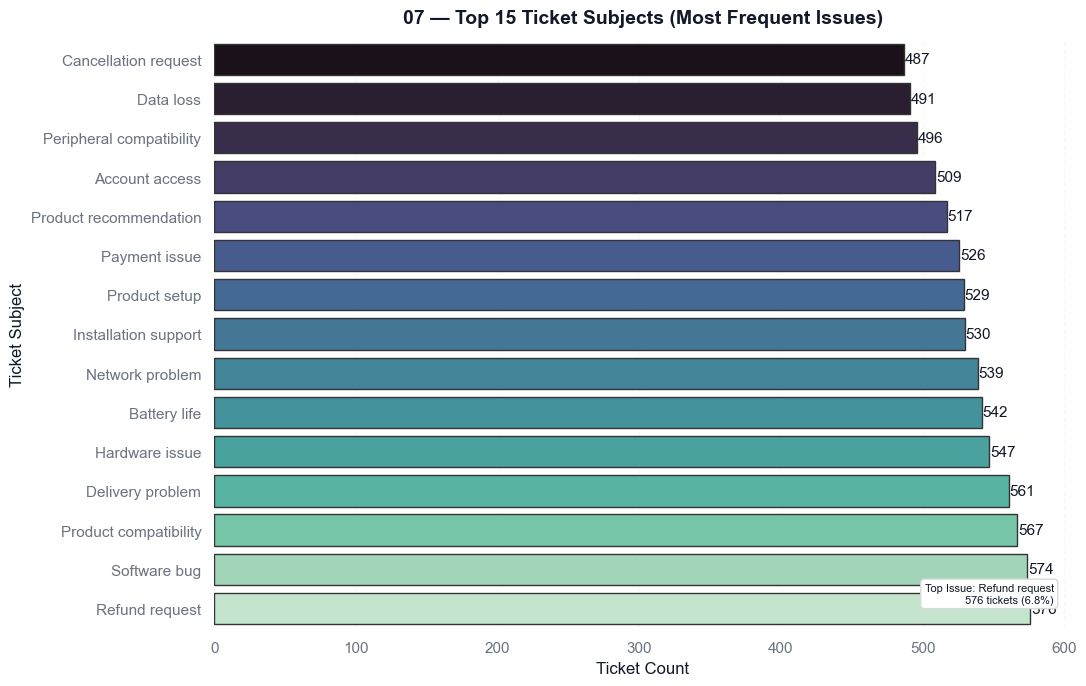

Saved: ../outputs/figures\07_top15_ticket_subjects.png


In [20]:
top_subjects = df["ticket_subject"].value_counts().head(15)
top_subjects = top_subjects.sort_values(ascending=True)

plt.figure(figsize=(11, 7))

colors = sns.color_palette("mako", n_colors=len(top_subjects))

ax = sns.barplot(
    x=top_subjects.values,
    y=top_subjects.index,
    palette=colors,
    edgecolor="0.2")

for i, v in enumerate(top_subjects.values):
    ax.text(v + 0.5, i, f"{int(v)}", va="center", fontsize=11)

wrapped_labels = [textwrap.fill(label, 28) for label in top_subjects.index]
ax.set_yticklabels(wrapped_labels)

ax.set_title("07 — Top 15 Ticket Subjects (Most Frequent Issues)", pad=12)
ax.set_xlabel("Ticket Count")
ax.set_ylabel("Ticket Subject")

ax.grid(True, axis="x", linestyle="--", alpha=0.25)
sns.despine(left=True, bottom=True)

top_issue = df["ticket_subject"].value_counts().idxmax()
top_issue_count = df["ticket_subject"].value_counts().max()
total_tickets = len(df)
top_pct = (top_issue_count / total_tickets) * 100

plt.text(
    0.98, 0.04,
    f"Top Issue: {top_issue}\n{top_issue_count} tickets ({top_pct:.1f}%)",
    transform=ax.transAxes,
    ha="right",
    va="bottom",
    fontsize=8,
    bbox=dict(boxstyle="round,pad=0.35", fc="white", ec="0.85"))

plt.tight_layout()

save_path = os.path.join(OUTPUT_DIR, "07_top15_ticket_subjects.png")
plt.savefig(save_path, dpi=300)
plt.show()

print("Saved:", save_path)

## Ticket Trend Monthly

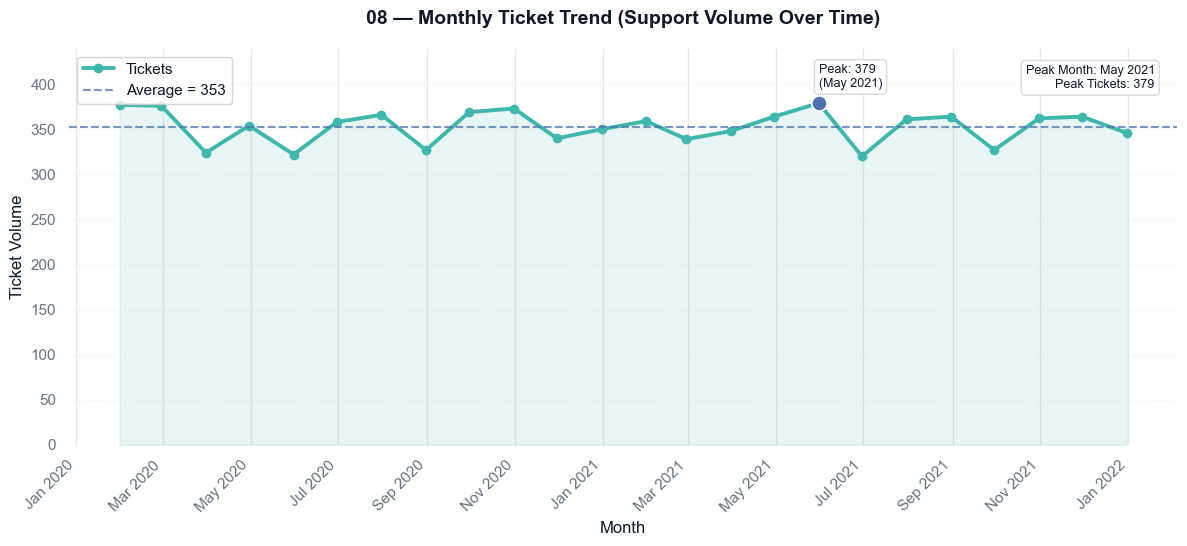

Saved: ../outputs/figures\08_ticket_trend_monthly.png


In [23]:
date_col = "date"
df[date_col] = pd.to_datetime(df[date_col], errors="coerce")

monthly = df.dropna(subset=[date_col]).set_index(date_col).resample("M").size()

avg_val = monthly.mean()
peak_month = monthly.idxmax()
peak_val = monthly.max()

line_color = sns.color_palette("mako", 6)[4]

plt.figure(figsize=(12, 6))
plt.plot(monthly.index, monthly.values, marker="o", linewidth=2.8, color=line_color, label="Tickets")
plt.fill_between(monthly.index, monthly.values, alpha=0.12, color=line_color)
plt.axhline(avg_val, linestyle="--", linewidth=1.5, alpha=0.75, label=f"Average = {avg_val:.0f}")
plt.scatter(peak_month, peak_val, s=120, zorder=5, edgecolor="white", linewidth=1.2)
plt.annotate(
    f"Peak: {peak_val}\n({peak_month.strftime('%b %Y')})",
    xy=(peak_month, peak_val),
    xytext=(peak_month, peak_val + 18),   
    textcoords="data",
    arrowprops=dict(arrowstyle="->", lw=1.2),
    fontsize=9,
    bbox=dict(boxstyle="round,pad=0.35", fc="white", ec="0.85"))

plt.title("08 — Monthly Ticket Trend (Support Volume Over Time)", pad=18)  
plt.xlabel("Month")
plt.ylabel("Ticket Volume")

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.xticks(rotation=45, ha="right")
plt.grid(True, axis="y", linestyle="--", alpha=0.25)
sns.despine(left=True, bottom=True)
plt.text(
    0.98, 0.96,
    f"Peak Month: {peak_month.strftime('%b %Y')}\nPeak Tickets: {peak_val}",
    transform=ax.transAxes,
    ha="right",
    va="top",
    fontsize=9,
    bbox=dict(boxstyle="round,pad=0.35", fc="white", ec="0.85"))

plt.ylim(0, monthly.max() + 60)

plt.legend(loc="upper left")
plt.tight_layout()
plt.subplots_adjust(top=0.88, bottom=0.22)  

save_path = os.path.join(OUTPUT_DIR, "08_ticket_trend_monthly.png")
plt.savefig(save_path, dpi=300)
plt.show()

print("Saved:", save_path)

# WordCloud 

Using text columns: ['ticket_subject', 'ticket_description']


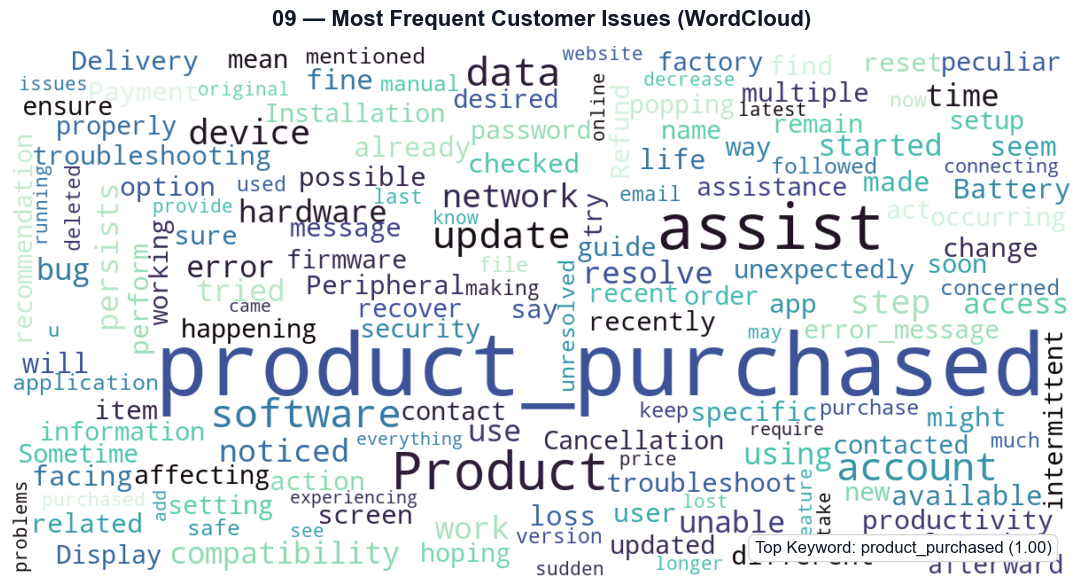

Saved: ../outputs/figures\09_wordcloud.png


In [24]:
text_cols = [c for c in df.columns if ("subject" in c.lower()) or ("description" in c.lower())]
print("Using text columns:", text_cols)

text_data = df[text_cols].astype(str).fillna("").agg(" ".join, axis=1)
all_text = " ".join(text_data)

custom_stopwords = set(STOPWORDS)
custom_stopwords.update([
    "ticket", "support", "customer", "issue", "help", "please",
    "request", "problem", "need", "thanks", "thank", "regards"])

x, y = np.ogrid[:600, :1200]
center_x, center_y = 1200/2, 600/2
radius = 280
mask = ((x - center_y)**2 + (y - center_x)**2 > radius**2).astype(int) * 255

wc = WordCloud(
    width=1200,
    height=600,
    background_color="white",
    stopwords=custom_stopwords,
    colormap="mako",
    max_words=150,
    collocations=False,     
    contour_width=2,        
    contour_color="#111827" 
).generate(all_text)
plt.figure(figsize=(14, 6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

plt.title(
    "09 — Most Frequent Customer Issues (WordCloud)",
    fontsize=16, pad=14, fontweight="bold")

top_word = list(wc.words_.keys())[0]
top_score = wc.words_[top_word]
plt.text(
    0.98, 0.04,
    f"Top Keyword: {top_word} ({top_score:.2f})",
    transform=plt.gca().transAxes,
    ha="right",
    va="bottom",
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.35", fc="white", ec="0.85"))
plt.tight_layout()
save_path = os.path.join(OUTPUT_DIR, "09_wordcloud.png")
plt.savefig(save_path, dpi=300, bbox_inches="tight")
plt.show()

print("Saved:", save_path)

In [6]:
import re

def find_col(cols, keywords):
    """
    cols: list of column names
    keywords: list of keywords to search
    returns best match column name or None
    """
    for k in keywords:
        for c in cols:
            if k in c.lower():
                return c
    return None

cols = df.columns.tolist()

subject_col = find_col(cols, ["ticket_subject", "subject"])
desc_col    = find_col(cols, ["ticket_description", "description", "desc"])

print("Detected Subject Column:", subject_col)
print("Detected Description Column:", desc_col)

if subject_col is None or desc_col is None:
    raise ValueError("❌ Subject/Description column not found. Print df.columns and check names.")

df["text_combined"] = (
    df[subject_col].astype(str).fillna("") + " " +
    df[desc_col].astype(str).fillna("")
).str.lower()


df["text_combined"] = df["text_combined"].str.replace(r"[^a-z0-9\s]", " ", regex=True)
df["text_combined"] = df["text_combined"].str.replace(r"\s+", " ", regex=True).str.strip()

print("text_combined created successfully!")
df[["text_combined"]].head()

Detected Subject Column: Ticket Subject
Detected Description Column: Ticket Description
text_combined created successfully!


,text_combined
0,product setup i m having an issue with the pro...
1,peripheral compatibility i m having an issue w...
2,network problem i m facing a problem with my p...
3,account access i m having an issue with the pr...
4,data loss i m having an issue with the product...


In [7]:
df.to_csv("../data/eda_clean.csv", index=False)
print("✅ Saved updated eda_clean.csv with text_combined column!")

✅ Saved updated eda_clean.csv with text_combined column!
